In [1]:
from ssl import DER_cert_to_PEM_cert
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
# Read the input image
def detect_face(img):
  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  # Draw rectangle around the faces and crop the faces
  for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = gray[y:y + h, x:x + w]
    
  # Display the output
  # plt.imshow(faces)
  # cv2.waitKey()
  return faces

In [6]:
def prepare_training_data(training_data_folder_path):
  detected_faces = []
  face_labels = []
  total_pics = 0
  training_large_dirs = os.listdir(training_data_folder_path)

  for dir_name in training_large_dirs:

    # label = int(dir_name)

    training_image_path = training_data_folder_path+"/"+dir_name

    training_images_names = os.listdir(training_image_path)

    for image_name in training_images_names:
      # if(total_pics == 10):
      #   break
      total_pics+=1
      image_path = training_image_path + "/" + image_name
      # print(image_path)

      image = cv2.imread(image_path) 

      # face, rect = detect_face(image)
      face = detect_face(image)
      if(len(face) == 0):
        continue

      # resized_face = cv2.resize(face, (120, 120), interpolation = cv2.INTER_AREA)
      
      resized_face = cv2.resize(face, (120, 120))
      detected_faces.append(resized_face)
      face_labels.append(dir_name)
  print(len(detected_faces))
  print(total_pics)
  return detected_faces, face_labels

In [7]:
detected_faces, face_labels = prepare_training_data("mlData")
print(detected_faces,face_labels)

155
241
[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   1,   2,   0],
       [  0,   1,   6, ...,  10,  12,   0],
       ...,
       [  0,   4,  25, ...,  94, 100,   5],
       [  0,   4,  26, ...,  97, 100,   5],
       [  0,   0,   1, ...,   5,   5,   0]], dtype=uint8), array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 64, 24,  0],
       [ 0,  0,  0, ..., 24,  9,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 26, ..., 22, 22,  0],
       ...,
       [ 0,  0, 27, ..., 25, 26,  0],
       [ 0,  0, 25, ..., 19, 21,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  4, ..., 15, 12,  0],
       ...,
       [ 0,  0,  5, ..., 31, 30,  0],
       [ 0,  0,  5, ..., 2

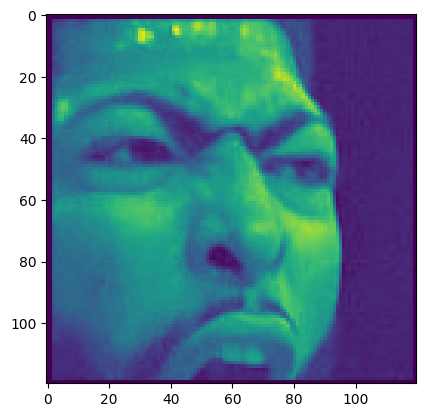

In [8]:
plt.imshow(detected_faces[2])

In [9]:
from sklearn import decomposition

# print(detected_faces)
detected_faces = np.array(detected_faces)
print(detected_faces.shape)

# X = flattened faces
X = []
for i in range(len(detected_faces)):
    X.append(detected_faces[i].flatten())
X = np.array(X)
print(X.shape)
# print(flattened_faces)
pca = decomposition.PCA(n_components = 80)
pca.fit(X)

Y = pca.transform(X)
print('Y shape',Y.shape)

# unessesary
xhat = pca.inverse_transform(Y)
print(xhat)
print(xhat.shape)

(155, 120, 120)
(155, 14400)
Y shape (155, 80)
[[ -9.0799131   -8.91399139  -9.14872983 ...   9.92517028  11.58956786
   10.24566897]
 [  6.56721979   5.12520094   7.8600363  ...   5.72527839   4.30775994
    1.75226996]
 [ -4.20072643  -2.33701827  -5.31163535 ...  -9.95230269  -9.05774921
   -5.81557026]
 ...
 [  2.42600552   1.80333119   1.35178415 ... -11.19318969  -7.94068367
   -7.6853758 ]
 [ -8.47356771  -7.70825676  -7.61295699 ...   9.19566703   8.17283433
    5.97634171]
 [  3.60249498   6.36505686   3.54118103 ...  77.46954308  78.4405459
   58.82045434]]
(155, 14400)


(14400,)


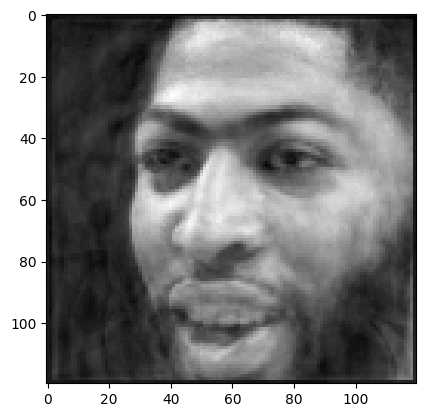

In [10]:
pic = xhat[0]
print(pic.shape)
pic = np.array(pic)
pic = pic.reshape(120,120)
plt.imshow(pic, cmap='gray')

In [11]:
test_faces, test_labels = prepare_training_data("test_data")

17
22


In [13]:
test_faces = np.array(test_faces)
print(test_faces.shape)

# X = flattened faces
test_X = []
for i in range(len(test_faces)):
    test_X.append(test_faces[i].flatten())
test_X = np.array(test_X)
print(test_X.shape)

test_Y = pca.transform(test_X)

(17, 120, 120)
(17, 14400)


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# import seaborn as sns


In [15]:
k=7
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Y, face_labels)
    
    training_score = knn.score(test_Y, test_labels)
    # training_score = knn.predict(test_Y)
    print('k =',k,training_score)
    return training_score

k = 1 0.4117647058823529
k = 2 0.23529411764705882
k = 3 0.29411764705882354
k = 4 0.4117647058823529
k = 5 0.35294117647058826
k = 6 0.29411764705882354
k = 7 0.29411764705882354
k = 8 0.35294117647058826
[0.4117647058823529, 0.23529411764705882, 0.29411764705882354, 0.4117647058823529, 0.35294117647058826, 0.29411764705882354, 0.29411764705882354, 0.35294117647058826]


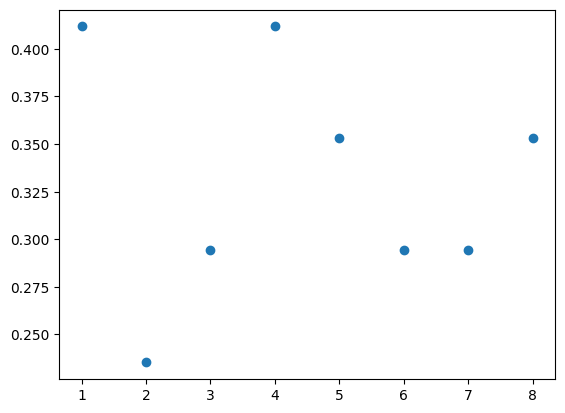

In [17]:
y=[]
x=[]
for i in range(1,9):
    y.append(KNN(i))
    x.append(i)
print(y)
plt.scatter(x, y)
plt.show()